In [1]:
import tensorflow as tf
from samplify_data import samplify_data
from tensorflow.python.keras import layers, models

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)       

In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)       

In [14]:
train_data, test_data, val_data = samplify_data(skip_test=True)

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_data, epochs=10,
                    validation_data=test_data)

Epoch 1/10


2023-03-24 10:13:18.211362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


163/163 [==============================] - ETA: 0s - loss: 0.2682 - accuracy: 0.8811

2023-03-24 10:13:31.337737: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


163/163 [==============================] - 14s 79ms/step - loss: 0.2682 - accuracy: 0.8811 - val_loss: 0.3609 - val_accuracy: 0.8446
Epoch 2/10
163/163 [==============================] - 13s 76ms/step - loss: 0.1249 - accuracy: 0.9538 - val_loss: 0.8187 - val_accuracy: 0.7548
Epoch 3/10
163/163 [==============================] - 12s 75ms/step - loss: 0.0850 - accuracy: 0.9711 - val_loss: 0.9037 - val_accuracy: 0.7965
Epoch 4/10
163/163 [==============================] - 13s 75ms/step - loss: 0.0757 - accuracy: 0.9726 - val_loss: 1.0673 - val_accuracy: 0.7724
Epoch 5/10
163/163 [==============================] - 13s 76ms/step - loss: 0.0627 - accuracy: 0.9797 - val_loss: 1.3759 - val_accuracy: 0.7292
Epoch 6/10
163/163 [==============================] - 13s 78ms/step - loss: 0.0630 - accuracy: 0.9757 - val_loss: 0.8834 - val_accuracy: 0.7901
Epoch 7/10
163/163 [==============================] - 13s 78ms/step - loss: 0.0544 - accuracy: 0.9793 - val_loss: 1.2139 - val_accuracy: 0.7724
Epo

In [16]:
test = model.predict(val_data, verbose=1, steps=100)

100/100 [==============================] - 0s 190us/step


2023-03-24 10:15:30.595488: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 - 1s - loss: 1.6571 - accuracy: 0.7356


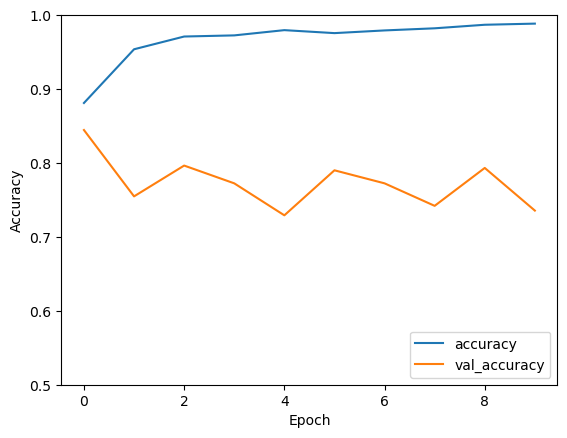

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_data, verbose=2)

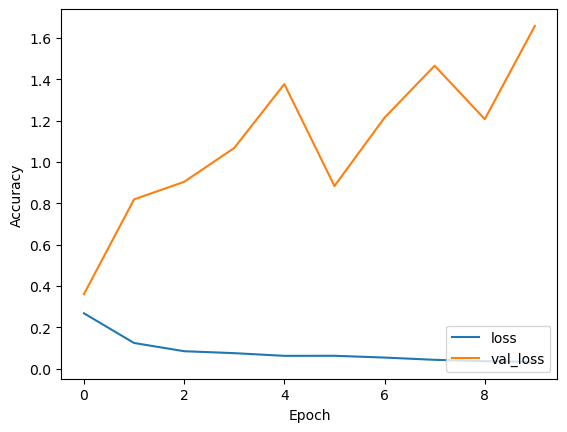

In [35]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')